In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import os

In [2]:
df=pd.read_csv(r"C:\Users\91883\Downloads\data.csv")
df.head()

,Answer,Answer.f1.afraid.raw,Answer.f1.angry.raw,Answer.f1.anxious.raw,Answer.f1.ashamed.raw,Answer.f1.awkward.raw,Answer.f1.bored.raw,Answer.f1.calm.raw,Answer.f1.confused.raw,Answer.f1.disgusted.raw,...,Answer.t1.family.raw,Answer.t1.food.raw,Answer.t1.friends.raw,Answer.t1.god.raw,Answer.t1.health.raw,Answer.t1.love.raw,Answer.t1.recreation.raw,Answer.t1.school.raw,Answer.t1.sleep.raw,Answer.t1.work.raw
0,"My family was the most salient part of my day,...",False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,Yoga keeps me focused. I am able to take some ...,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,"Yesterday, my family and I played a bunch of b...",False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
3,"Yesterday, I visited my parents and had dinner...",False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
4,"Yesterday, I really felt the importance of my ...",False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [3]:
df.replace({False: 0, True: 1}, inplace=True)
#df.head()

C:\Users\91883\AppData\Local\Temp\ipykernel_6640\2161172126.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({False: 0, True: 1}, inplace=True)


In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
import string 

df = pd.read_csv(r"C:\Users\91883\Downloads\data.csv")

df.replace({False: 0, True: 1}, inplace=True)

list_pos = []
list_neg = []
list_neu = []
list_compound = []

for row in range (0, df.shape[0]):
    
    example_sent = df.iloc[row]['Answer']
    example_sent = example_sent.replace(r'.', '')
    example_sent = example_sent.replace(r',', '')
    example_sent = example_sent.replace(r'!', '')
    example_sent = example_sent.replace(r';', '')
    example_sent = example_sent.replace(r'?', '')
    example_sent = example_sent.replace(r'(', '')
    example_sent = example_sent.replace(r')', '')
    example_sent = example_sent.replace(r"'", '')
    
    #example_sent = example_sent[0].replace(r'[^\w\s]+,', '')
    stop_words = set(stopwords.words('english'))
    list_contractions_common = {'arent', 'cant', 'couldnt', 'didnt', 'doesnt', 'dont', 'hadnt', 'havent', 'shouldnt', 'wouldnt', 'youve','youre','wont','werent', 'weve','wed', 'theyre', 'Im'}
    stop_words.update(list_contractions_common)

    word_tokens = word_tokenize(example_sent)
    # converts the words in word_tokens to lower case and then checks whether 
    #they are present in stop_words or not
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    #with no lower case conversion
    filtered_sentence = []
    

    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
            
    filtered_sentence = ' '.join(filtered_sentence)
       
            
    df.at[row,'Answer'] = filtered_sentence
    
    list_pos.append((sia.polarity_scores(filtered_sentence))['pos'])
    list_neg.append((sia.polarity_scores(filtered_sentence))['neg'])
    list_neu.append((sia.polarity_scores(filtered_sentence))['neu'])
    list_compound.append((sia.polarity_scores(filtered_sentence))['compound'])
    
df['positive_score'] = list_pos
df['negative_score'] = list_neg
df['neutral_score'] = list_neu
df['compound_score'] = list_compound

C:\Users\91883\AppData\Local\Temp\ipykernel_6640\3156286392.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({False: 0, True: 1}, inplace=True)


In [5]:
#df.head()

In [6]:
df.rename(columns={"Answer.f1.afraid.raw": "afraid", 
                   "Answer.f1.angry.raw": "angry", 
                   "Answer.f1.anxious.raw": "anxious", 
                   "Answer.f1.ashamed.raw": "ashamed", 
                   "Answer.f1.awkward.raw": "awkward", 
                   "Answer.f1.bored.raw": "bored", 
                   "Answer.f1.calm.raw": "calm", 
                   "Answer.f1.confused.raw": "confused", 
                   "Answer.f1.disgusted.raw": "disgusted", 
                   "Answer.f1.excited.raw": "excited", 
                   "Answer.f1.frustrated.raw": "frustrated", 
                   "Answer.f1.happy.raw": "happy", 
                   "Answer.f1.jealous.raw": "jealous", 
                   "Answer.f1.nostalgic.raw": "nostalgic", 
                   "Answer.f1.proud.raw": "proud", 
                   "Answer.f1.sad.raw": "sad", 
                   "Answer.f1.satisfied.raw": "satisfied", 
                   "Answer.f1.surprised.raw": "surprised", 
                   "Answer.t1.exercise.raw": "exercise", 
                   "Answer.t1.family.raw": "family", 
                   "Answer.t1.food.raw": "food", 
                   "Answer.t1.friends.raw": "friends", 
                   "Answer.t1.god.raw": "god", 
                   "Answer.t1.health.raw": "health", 
                   "Answer.t1.love.raw": "love", 
                   "Answer.t1.recreation.raw": "recreation", 
                   "Answer.t1.school.raw": "school", 
                   "Answer.t1.sleep.raw": "sleep", 
                   "Answer.t1.work.raw": "work",                    
                  }, inplace=True)

In [7]:
final_emotion_list = []
for row in range (0, len(df)):
    emotion_list = []
    for col in range (1, 19):
        if (df.iloc[row][col] == 1):
            emotion_list.append(df.columns[col])
    final_emotion_list.append(emotion_list)

C:\Users\91883\AppData\Local\Temp\ipykernel_6640\3994999480.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (df.iloc[row][col] == 1):


In [8]:
df['Emotions Felt'] = final_emotion_list

In [9]:
df.head()

,Answer,afraid,angry,anxious,ashamed,awkward,bored,calm,confused,disgusted,...,love,recreation,school,sleep,work,positive_score,negative_score,neutral_score,compound_score,Emotions Felt
0,My family salient part day since days care 2 c...,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0.362,0.038,0.600,0.9274,"[anxious, happy, proud]"
1,Yoga keeps focused I able take time breath wor...,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0.253,0.000,0.747,0.5267,[calm]
2,Yesterday family I played bunch board games My...,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0.457,0.061,0.481,0.9300,"[calm, happy, satisfied]"
3,Yesterday I visited parents dinner I seen week...,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0.291,0.000,0.709,0.5719,"[calm, happy]"
4,Yesterday I really felt importance health I we...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.296,0.188,0.516,0.4998,[happy]


In [10]:
df_new = df[['Answer', 'Emotions Felt']]
df1 = df_new.rename(columns={'Answer': 'Text' , 'Emotions Felt':'Mood'})

In [11]:
import random
df1["Mood"]= df1["Mood"].apply(lambda x: random.choice(x))

In [12]:
df1.head()

,Text,Mood
0,My family salient part day since days care 2 c...,anxious
1,Yoga keeps focused I able take time breath wor...,calm
2,Yesterday family I played bunch board games My...,satisfied
3,Yesterday I visited parents dinner I seen week...,happy
4,Yesterday I really felt importance health I we...,happy


In [13]:
data=pd.read_csv(r"C:\Users\91883\Downloads\Daylio_Abid.csv")
data.head()

,full_date,date,weekday,time,mood,activities
0,16-04-2021,Apr-16,Friday,8:00 PM,yolo,reading | Art | prayer | fasting | walk | med...
1,15-04-2021,Apr-15,Thursday,2:37 AM,focused,reading | learning | Art | prayer | fasting ...
2,14-04-2021,Apr-14,Wednesday,2:39 AM,confused,reading | learning | prayer | fasting | Qura...
3,13-04-2021,Apr-13,Tuesday,2:38 AM,wondering,reading | learning | Art | prayer | fasting ...
4,12-04-2021,Apr-12,Monday,9:52 PM,angry,reading | learning | fasting | walk | medita...


In [14]:
data['activitess'] = data['activities'].str.replace('|', '')

In [15]:
data.head()

,full_date,date,weekday,time,mood,activities,activitess
0,16-04-2021,Apr-16,Friday,8:00 PM,yolo,reading | Art | prayer | fasting | walk | med...,reading Art prayer fasting walk meditati...
1,15-04-2021,Apr-15,Thursday,2:37 AM,focused,reading | learning | Art | prayer | fasting ...,reading learning Art prayer fasting wal...
2,14-04-2021,Apr-14,Wednesday,2:39 AM,confused,reading | learning | prayer | fasting | Qura...,reading learning prayer fasting Quran ...
3,13-04-2021,Apr-13,Tuesday,2:38 AM,wondering,reading | learning | Art | prayer | fasting ...,reading learning Art prayer fasting wal...
4,12-04-2021,Apr-12,Monday,9:52 PM,angry,reading | learning | fasting | walk | medita...,reading learning fasting walk meditation...


In [16]:
data['activitess'] = data['activitess'].str.replace('reading|learning|Art|prayer|fasting|walk|meditation|shower|dota|  |', '', regex=True)

In [17]:
data.head()

,full_date,date,weekday,time,mood,activities,activitess
0,16-04-2021,Apr-16,Friday,8:00 PM,yolo,reading | Art | prayer | fasting | walk | med...,writingWatching series good mealredditlangua...
1,15-04-2021,Apr-15,Thursday,2:37 AM,focused,reading | learning | Art | prayer | fasting ...,Audio books writingWatching series good mea...
2,14-04-2021,Apr-14,Wednesday,2:39 AM,confused,reading | learning | prayer | fasting | Qura...,Quran podcastAudio books writingWatching se...
3,13-04-2021,Apr-13,Tuesday,2:38 AM,wondering,reading | learning | Art | prayer | fasting ...,Audio books writingWatching series News Upd...
4,12-04-2021,Apr-12,Monday,9:52 PM,angry,reading | learning | fasting | walk | medita...,writingWatching series good mealredditlangu...


In [18]:
data_new = data[['activitess', 'mood']]
df2 = data_new.rename(columns={'activitess': 'Text' , 'mood':'Mood'})

In [19]:
df2.head()

,Text,Mood
0,writingWatching series good mealredditlangua...,yolo
1,Audio books writingWatching series good mea...,focused
2,Quran podcastAudio books writingWatching se...,confused
3,Audio books writingWatching series News Upd...,wondering
4,writingWatching series good mealredditlangu...,angry


In [20]:
df_concat = pd.concat([df1, df2])
df_concat

,Text,Mood
0,My family salient part day since days care 2 c...,anxious
1,Yoga keeps focused I able take time breath wor...,calm
2,Yesterday family I played bunch board games My...,satisfied
3,Yesterday I visited parents dinner I seen week...,happy
4,Yesterday I really felt importance health I we...,happy
...,...,...
935,Write dairy Audio books good mealstreaming yo...,yolo
936,youtuberesearch,meh
937,good mealyoutubemovies,blessed
938,Write dairy Dota 2streaming shopping,angry


In [21]:
df_concat.to_csv('output1.csv', index=False)

In [22]:
df_concat["Mood"].unique()

array(['anxious', 'calm', 'satisfied', 'happy', 'sad', 'proud', 'excited',
       'frustrated', 'bored', 'surprised', 'disgusted', 'confused',
       'angry', 'afraid', 'nostalgic', 'awkward', 'ashamed', 'yolo',
       'focused ', 'confused ', 'wondering', 'blessed ', 'excited ',
       'Chill', 'hungry ', 'happiest day', 'weak', 'meh', 'awful', 'Cool',
       'worried ', 'over the moon ', 'triggered ', 'sad af', 'scared ',
       'good', 'bad', 'sick'], dtype=object)

In [23]:
data1=pd.read_csv(r"C:\Users\91883\Downloads\data.csv")
data1.replace({False: 0, True: 1}, inplace=True)
data1.head()

C:\Users\91883\AppData\Local\Temp\ipykernel_6640\3084210158.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data1.replace({False: 0, True: 1}, inplace=True)


,Answer,Answer.f1.afraid.raw,Answer.f1.angry.raw,Answer.f1.anxious.raw,Answer.f1.ashamed.raw,Answer.f1.awkward.raw,Answer.f1.bored.raw,Answer.f1.calm.raw,Answer.f1.confused.raw,Answer.f1.disgusted.raw,...,Answer.t1.family.raw,Answer.t1.food.raw,Answer.t1.friends.raw,Answer.t1.god.raw,Answer.t1.health.raw,Answer.t1.love.raw,Answer.t1.recreation.raw,Answer.t1.school.raw,Answer.t1.sleep.raw,Answer.t1.work.raw
0,"My family was the most salient part of my day,...",0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,Yoga keeps me focused. I am able to take some ...,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Yesterday, my family and I played a bunch of b...",0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,"Yesterday, I visited my parents and had dinner...",0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,"Yesterday, I really felt the importance of my ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [24]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
import string 

df = pd.read_csv(r"C:\Users\91883\Downloads\data.csv")

df.replace({False: 0, True: 1}, inplace=True)

list_pos = []
list_neg = []
list_neu = []
list_compound = []

for row in range (0, df.shape[0]):
    
    example_sent = df.iloc[row]['Answer']
    example_sent = example_sent.replace(r'.', '')
    example_sent = example_sent.replace(r',', '')
    example_sent = example_sent.replace(r'!', '')
    example_sent = example_sent.replace(r';', '')
    example_sent = example_sent.replace(r'?', '')
    example_sent = example_sent.replace(r'(', '')
    example_sent = example_sent.replace(r')', '')
    example_sent = example_sent.replace(r"'", '')
    
    #example_sent = example_sent[0].replace(r'[^\w\s]+,', '')
    stop_words = set(stopwords.words('english'))
    list_contractions_common = {'arent', 'cant', 'couldnt', 'didnt', 'doesnt', 'dont', 'hadnt', 'havent', 'shouldnt', 'wouldnt', 'youve','youre','wont','werent', 'weve','wed', 'theyre', 'Im'}
    stop_words.update(list_contractions_common)

    word_tokens = word_tokenize(example_sent)
    # converts the words in word_tokens to lower case and then checks whether 
    #they are present in stop_words or not
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    #with no lower case conversion
    filtered_sentence = []
    

    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
            
    filtered_sentence = ' '.join(filtered_sentence)
       
            
    df.at[row,'Answer'] = filtered_sentence
    
    list_pos.append((sia.polarity_scores(filtered_sentence))['pos'])
    list_neg.append((sia.polarity_scores(filtered_sentence))['neg'])
    list_neu.append((sia.polarity_scores(filtered_sentence))['neu'])
    list_compound.append((sia.polarity_scores(filtered_sentence))['compound'])
    
df['positive_score'] = list_pos
df['negative_score'] = list_neg
df['neutral_score'] = list_neu
df['compound_score'] = list_compound

C:\Users\91883\AppData\Local\Temp\ipykernel_6640\3156286392.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({False: 0, True: 1}, inplace=True)


In [25]:
df.rename(columns={"Answer.f1.afraid.raw": "afraid", 
                   "Answer.f1.angry.raw": "angry", 
                   "Answer.f1.anxious.raw": "anxious", 
                   "Answer.f1.ashamed.raw": "ashamed", 
                   "Answer.f1.awkward.raw": "awkward", 
                   "Answer.f1.bored.raw": "bored", 
                   "Answer.f1.calm.raw": "calm", 
                   "Answer.f1.confused.raw": "confused", 
                   "Answer.f1.disgusted.raw": "disgusted", 
                   "Answer.f1.excited.raw": "excited", 
                   "Answer.f1.frustrated.raw": "frustrated", 
                   "Answer.f1.happy.raw": "happy", 
                   "Answer.f1.jealous.raw": "jealous", 
                   "Answer.f1.nostalgic.raw": "nostalgic", 
                   "Answer.f1.proud.raw": "proud", 
                   "Answer.f1.sad.raw": "sad", 
                   "Answer.f1.satisfied.raw": "satisfied", 
                   "Answer.f1.surprised.raw": "surprised", 
                   "Answer.t1.exercise.raw": "exercise", 
                   "Answer.t1.family.raw": "family", 
                   "Answer.t1.food.raw": "food", 
                   "Answer.t1.friends.raw": "friends", 
                   "Answer.t1.god.raw": "god", 
                   "Answer.t1.health.raw": "health", 
                   "Answer.t1.love.raw": "love", 
                   "Answer.t1.recreation.raw": "recreation", 
                   "Answer.t1.school.raw": "school", 
                   "Answer.t1.sleep.raw": "sleep", 
                   "Answer.t1.work.raw": "work",                    
                  }, inplace=True)

In [26]:
final_emotion_list = []
for row in range (0, len(df)):
    emotion_list = []
    for col in range (1, 19):
        if (df.iloc[row][col] == 1):
            emotion_list.append(df.columns[col])
    final_emotion_list.append(emotion_list)
df['Emotions Felt'] = final_emotion_list

C:\Users\91883\AppData\Local\Temp\ipykernel_6640\1364292872.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (df.iloc[row][col] == 1):


In [27]:
#dropping all the cols for emotions now that we have a comprehensive one at the end
df = df.drop(df.iloc[:, 1:30],axis = 1)
df.head()

,Answer,positive_score,negative_score,neutral_score,compound_score,Emotions Felt
0,My family salient part day since days care 2 c...,0.362,0.038,0.600,0.9274,"[anxious, happy, proud]"
1,Yoga keeps focused I able take time breath wor...,0.253,0.000,0.747,0.5267,[calm]
2,Yesterday family I played bunch board games My...,0.457,0.061,0.481,0.9300,"[calm, happy, satisfied]"
3,Yesterday I visited parents dinner I seen week...,0.291,0.000,0.709,0.5719,"[calm, happy]"
4,Yesterday I really felt importance health I we...,0.296,0.188,0.516,0.4998,[happy]


In [28]:
positive_emotions = ['satisfied', 'calm', 'happy', 'nostalgic', 'excited', 'proud', 'surprised']
negative_emotions = ['afraid', 'anxious', 'awkward', 'confused', 'ashamed', 'sad', 'angry', 'frustrated', 'disgusted', 'bored', 'jealous']

In [29]:
import random
positive_emotions = {'satisfied', 'calm', 'happy', 'nostalgic', 'excited', 'proud', 'surprised'}
negative_emotions = {'afraid', 'anxious', 'awkward', 'confused', 'ashamed', 'sad', 'angry', 'frustrated', 'disgusted', 'bored', 'jealous'}
p1 = {'satisfied', 'calm', 'happy', 'nostalgic'}
p2 = {'excited', 'proud', 'surprised'}

n1 = {'afraid', 'anxious', 'awkward', 'confused', 'ashamed', 'sad'}
n2 = {'angry', 'frustrated', 'disgusted', 'bored', 'jealous'}

for row in range (0, len(df)):
    #topic_list = []
    if ((len(df.iloc[row][-1])) > 1):
        pos = []
        neg = []
        for emotion in (df.iloc[row][-1]):
            if (emotion in positive_emotions):
                pos.append(emotion)
            else:
                neg.append(emotion)
        if (len(pos) == len(neg)):
            c1 = 0
            c2 = 0
            c3 = 0
            c4 = 0
            for i in range (len(pos)):
                if (pos[i] in p1):
                    c1 = c1 + 1
                elif (pos[i] in p2):
                    c2 = c2 + 1
                elif (pos[i] in n1):
                    c3 = c3 + 1
                else:
                    c4 = c4 + 1
            max_val = max(c1, c2, c3, c4)
            if (max_val == c1):  
                value = 'happy'
            elif (max_val == c2):  
                value = 'excited'
            if (max_val == c3):  
                value = 'anxious'
            else:
                value  = 'angry'
            df.iat[row,-1] = [value]
        elif (len(pos) > len(neg)):
            c1 = 0
            c2 = 0
            for i in range (len(pos)):
                if (pos[i] in p1):
                    c1 = c1 + 1
                else:
                    c2 = c2 + 1
            if (c1 > c2):    
                value = 'happy'
            else:
                value  = 'excited'
            df.iat[row,-1] = [value]
        else:
            c1 = 0
            c2 = 0
            for i in range (len(neg)):
                if (neg[i] in n1):
                    c1 = c1 + 1
                else:
                    c2 = c2 + 1
            if (c1 > c2):    
                value = 'anxious'
            else:
                value  = 'angry'
            df.iat[row,-1] = [value]
         
    if (set(df.iloc[row][-1]).issubset(p1)):
        df.iat[row,-1] = 'happy'
    elif (set(df.iloc[row][-1]).issubset(p2)):
        df.iat[row,-1] = 'excited'
    elif (set(df.iloc[row][-1]).issubset(n1)):
        df.iat[row,-1] = 'anxious'
    else:
        df.iat[row,-1] = 'angry'
df.head(10)

C:\Users\91883\AppData\Local\Temp\ipykernel_6640\3024605502.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ((len(df.iloc[row][-1])) > 1):
C:\Users\91883\AppData\Local\Temp\ipykernel_6640\3024605502.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  for emotion in (df.iloc[row][-1]):
C:\Users\91883\AppData\Local\Temp\ipykernel_6640\3024605502.py:71: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (set(df.iloc[row][-1]).is

,Answer,positive_score,negative_score,neutral_score,compound_score,Emotions Felt
0,My family salient part day since days care 2 c...,0.362,0.038,0.600,0.9274,excited
1,Yoga keeps focused I able take time breath wor...,0.253,0.000,0.747,0.5267,happy
2,Yesterday family I played bunch board games My...,0.457,0.061,0.481,0.9300,happy
3,Yesterday I visited parents dinner I seen week...,0.291,0.000,0.709,0.5719,happy
4,Yesterday I really felt importance health I we...,0.296,0.188,0.516,0.4998,happy
5,Yesterday I go work It first day back work wee...,0.235,0.324,0.441,-0.3400,angry
6,Yesterday I got lot things ready listing field...,0.203,0.000,0.797,0.7269,excited
7,Yesterday I finished two requirements semester...,0.251,0.000,0.749,0.6908,excited
8,yesterday work like good old days There much I...,0.330,0.180,0.489,0.5994,excited
9,Yesterday sixth month I read sixth chapter Pro...,0.397,0.000,0.603,0.9100,happy


In [32]:
print((df.iloc[:,5:6]).value_counts()['happy'])
print((df.iloc[:,5:6]).value_counts()['angry'])
print((df.iloc[:,5:6]).value_counts()['excited'])
print((df.iloc[:,5:6]).value_counts()['anxious'])

892
168
332
81


In [33]:
df.to_csv('output2.csv', index=False)

In [44]:
#importing libraries and modules
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [45]:
df_copied = df.copy()

In [46]:
df_copied['Emotions Felt'] = df_copied['Emotions Felt'].replace('happy',0)
df_copied['Emotions Felt'] = df_copied['Emotions Felt'].replace('excited',1)
df_copied['Emotions Felt'] = df_copied['Emotions Felt'].replace('angry',2)
df_copied['Emotions Felt'] = df_copied['Emotions Felt'].replace('anxious',3)

C:\Users\91883\AppData\Local\Temp\ipykernel_6640\3204240526.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copied['Emotions Felt'] = df_copied['Emotions Felt'].replace('anxious',3)


In [47]:
df_copied.iloc[:,1:5]

,positive_score,negative_score,neutral_score,compound_score
0,0.362,0.038,0.600,0.9274
1,0.253,0.000,0.747,0.5267
2,0.457,0.061,0.481,0.9300
3,0.291,0.000,0.709,0.5719
4,0.296,0.188,0.516,0.4998
...,...,...,...,...
1468,0.655,0.000,0.345,0.8591
1469,0.710,0.000,0.290,0.9287
1470,0.360,0.117,0.523,0.8360
1471,0.195,0.000,0.805,0.7778


c:\Users\91883\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Class=1, n=3000 (25.000%)
Class=0, n=3000 (25.000%)
Class=2, n=3000 (25.000%)
Class=3, n=3000 (25.000%)


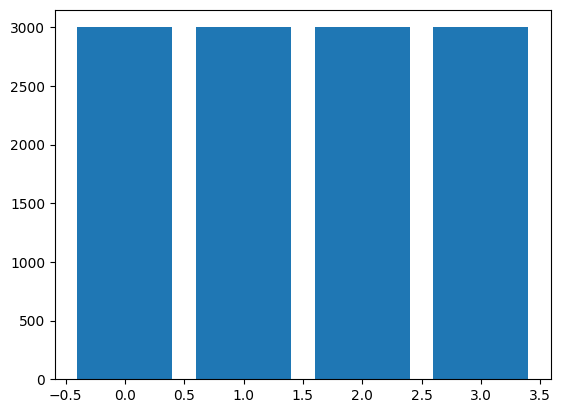

In [48]:
# example of oversampling a multi-class classification dataset
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
# define the dataset location
# split into input and output elements
X, y = df_copied.iloc[:,1:5], df_copied.iloc[:,5:6]
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# transform the dataset
#oversample = SMOTE()
strategy = {0:3000, 1:3000, 2:3000, 3:3000}
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [49]:
#ON DF_COPIED

from sklearn.ensemble import RandomForestClassifier #latest run took 1 hour 9min to run
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)
rfc = RandomForestClassifier(n_estimators = 150)
rfc.fit(X_train, y_train)
y_pred_combo = rfc.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred_combo)
print("Accuracy Score",acc)

Accuracy Score 0.8127777777777778


In [61]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
import string 
from textblob import TextBlob


list_pos = []
list_neg = []
list_neu = []
list_compound = []

s1 = "Today was a very hard day for me because 3 days ago I lost my dad forever. And then 3 days later my mom is admitted into the hospital. My two biggest supporters are going away from me in just a few days"
s2 = "Two days ago, I was sitting in my living room. And it was raining. I personally don't like rain because when it rains everything gets wet and I hate looking at wet things. Also, a clean freak. So like when it rains my family members come from outside and they have dirt in their shoes and make the whole house dirty."
s3 = "Wow! I just landed my first internship today! Yay! I had a call with the recruiter and we finalized some details. I can't believe it!"
s4 = "Tomorrow is my mom's birthday and I planned a surprise party for her. I bought her favorite cake, snacks, and invited close friends and family! I can't wait to see her expression!"
s5 = "I am so stressed. I have three exams, 2 essays, one project, and a club proposal to submit all by the end of this week."
s6 = "Today was a very hard day for me because I was really feeling homesick, and I was missing my family and friends. I miss all our times together."
s7 = "It is so frustrating that I have not received the amazon package I ordered which had the gift for my friend's birthday. I have been waiting for weeks and it has still not arrived!"
s8 = "I forgot my friend's birthday, and I feel really bad now. How could I do this?"
s9 = "I lost my car keys, and I have been searching for hours and I still can't find them. I hate this!"

#also has a spell checker to account for certain spelling mistakes: ex. releeived and dissappointing
s10 = "I got so much work done today, and I feel really relieeved so now I don't have to worry about much for some time."
s11 = "I went for a walk with a friend to a boba shop, but it was closed, so that was dissappointing. Oh well...maybe next time."

example_sent = s11
example_sent = example_sent.replace(r'.', '')
example_sent = example_sent.replace(r',', '')
example_sent = example_sent.replace(r'!', '')
example_sent = example_sent.replace(r';', '')
example_sent = example_sent.replace(r'?', '')
example_sent = example_sent.replace(r'(', '')
example_sent = example_sent.replace(r')', '')
example_sent = example_sent.replace(r"'", '')

#print(example_sent)

#example_sent = example_sent.replace(r'[^\w\s]+,', '')
stop_words = set(stopwords.words('english'))
list_contractions_common = {'arent', 'cant', 'couldnt', 'didnt', 'doesnt', 'hadnt', 'havent', 'shouldnt', 'wouldnt', 'youve','youre','wont','werent', 'weve','wed', 'theyre', 'Im', 'its'}
stop_words.update(list_contractions_common)

word_tokens = word_tokenize(example_sent)

#print(word_tokens)
# converts the words in word_tokens to lower case and then checks whether 
#they are present in stop_words or not
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
#with no lower case conversion
filtered_sentence = []


for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

filtered_sentence = ' '.join(filtered_sentence)
#print(filtered_sentence)

final_sentence = filtered_sentence
#filtered_sentence = TextBlob(filtered_sentence)
#filtered_sentence = str(filtered_sentence.correct())

print(filtered_sentence)

pos_score = (sia.polarity_scores(filtered_sentence))['pos']
neg_score = (sia.polarity_scores(filtered_sentence))['neg']
neutral_score = (sia.polarity_scores(filtered_sentence))['neu']
compound_score = (sia.polarity_scores(filtered_sentence))['compound']

    
#emotion_topic = "work"#topic entered by user, may have to implement an algorithm to pick a topic if multiple are entered
#creating a list of the necessary important
 
#lists = [pos_score, neg_score, neutral_score, compound_score]
#a = lists.reshape(1, -1)
#then you feed lists into the model to predict

data = {'positive_score': [pos_score], 'negative_score': [neg_score], 'neutral_score': [neutral_score], 'compound_score': [compound_score]}  
  
# Create DataFrame  
df_unseen = pd.DataFrame(data) 

predicted_score = rfc.predict(df_unseen)
#print(predicted_score)

#because the classification metrics were numbers, I need to convert them back to emotions
final_pred = ""
if (compound_score < 0):
    if (predicted_score == [2]):
        final_pred = 'angry'
    else:
        final_pred = 'anxious/sad'
elif (predicted_score == [0]):
    final_pred = 'happy'
elif (predicted_score == [1]):
    final_pred = 'excited'
elif (predicted_score == [2]):
    final_pred = 'angry'
else:
    final_pred = 'anxious/sad'

print(final_pred)

I went walk friend boba shop closed dissappointing Oh wellmaybe next time
happy


c:\Users\91883\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
